<a href="https://colab.research.google.com/github/dajuctech/Deep_Learning_Course/blob/main/Week%201%20DL%201/IrisOverfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting reduction with Dropout and Regularizers for the Iris DNN

Load the libraries and prepare the data

In [1]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# 2. split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)


Create, compile, fit the model and plot the accuracy and loss


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3147 - loss: 1.4316 - val_accuracy: 0.4211 - val_loss: 1.3149
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2987 - loss: 1.4255 - val_accuracy: 0.4211 - val_loss: 1.3132
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2919 - loss: 1.4006 - val_accuracy: 0.4474 - val_loss: 1.3152
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3012 - loss: 1.3706 - val_accuracy: 0.5526 - val_loss: 1.3121
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3910 - loss: 1.3333 - val_accuracy: 0.5789 - val_loss: 1.3097
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3839 - loss: 1.3217 - val_accuracy: 0.5526 - val_loss: 1.3045
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3515 - loss: 1.3312 - val_accuracy: 0.5789 - val_loss: 1.2978
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3783 - loss: 1.3071 - val_accuracy: 0.5263 - 

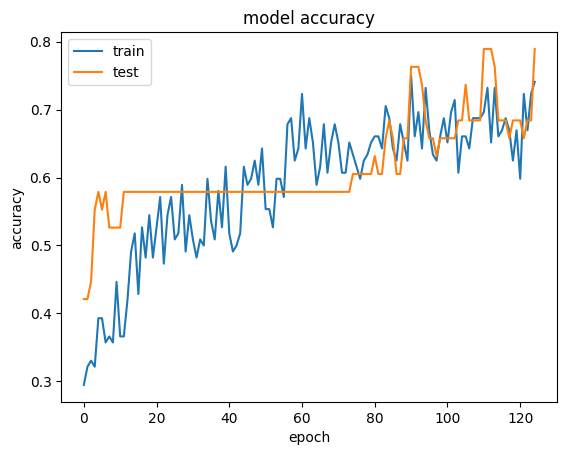

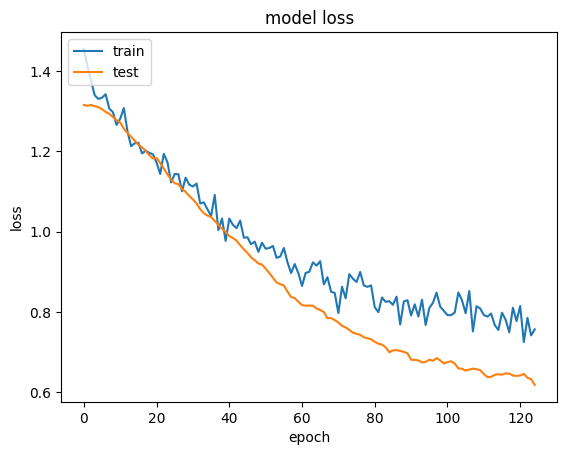

In [3]:
from tensorflow.keras.layers import Dropout
import tensorflow as tf

model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(units=10, activation='relu', kernel_regularizers=tf.keras.regularizers.l1(0.01)))
model.add(Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Add a dropout layer to reduce the overfitting
You will need to import the Dense layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3604 - loss: 1.3875 - val_accuracy: 0.3421 - val_loss: 1.4033
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4082 - loss: 1.3351 - val_accuracy: 0.3421 - val_loss: 1.3773
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4916 - loss: 1.3132 - val_accuracy: 0.4737 - val_loss: 1.3535
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4558 - loss: 1.2753 - val_accuracy: 0.5789 - val_loss: 1.3285
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4960 - loss: 1.2805 - val_accuracy: 0.5789 - val_loss: 1.3047
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4895 - loss: 1.2620 - val_accuracy: 0.5789 - val_loss: 1.2844
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5486 - loss: 1.2621 - val_accuracy: 0.5789 - val_loss: 1.2622
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4963 - loss: 1.2449 - val_accuracy: 0.5789 

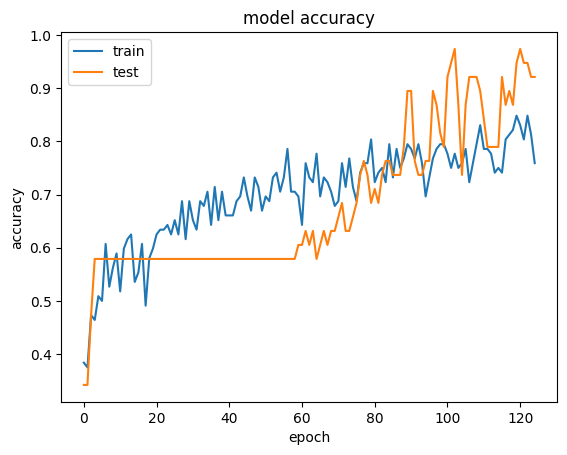

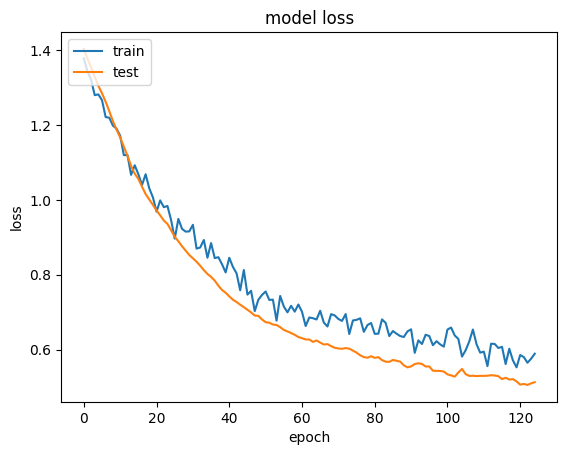

In [4]:
from IPython import get_ipython
from IPython.display import display
# %% [markdown]
# # Overfitting reduction with Dropout and Regularizers for the Iris DNN
# %% [markdown]
# Load the libraries and prepare the data
# %%
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# 2. split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

# %% [markdown]
# Create, compile, fit the model and plot the accuracy and loss
#
# %%
from tensorflow.keras.layers import Dropout
import tensorflow as tf

model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
# Add dropout after the first hidden layer
model.add(Dropout(0.5))  # Dropout rate of 0.5 means 50% of units are dropped during training
model.add(Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## It is common just to add dropout after the last hidden layer
Create a neural network with 3 hidden layers, teh first with 20 units, and the second and third layers with 100 units.

Add a dropout layer after the second layer with a dropout that decreases the hidden units by half.

Epoch 1/125


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3670 - loss: 1.0920 - val_accuracy: 0.5789 - val_loss: 1.0504
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3984 - loss: 1.0571 - val_accuracy: 0.5789 - val_loss: 1.0044
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6602 - loss: 1.0042 - val_accuracy: 0.5789 - val_loss: 0.9579
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6503 - loss: 0.9467 - val_accuracy: 0.5789 - val_loss: 0.8869
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7319 - loss: 0.8806 - val_accuracy: 0.5789 - val_loss: 0.8098
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7228 - loss: 0.7884 - val_accuracy: 0.5789 - val_loss: 0.7213
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6605 - loss: 0.7189 - val_accuracy: 0.5789 - val_loss: 0.6365
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7825 - loss: 0.6394 - val_accuracy: 0.5789 - val_loss: 

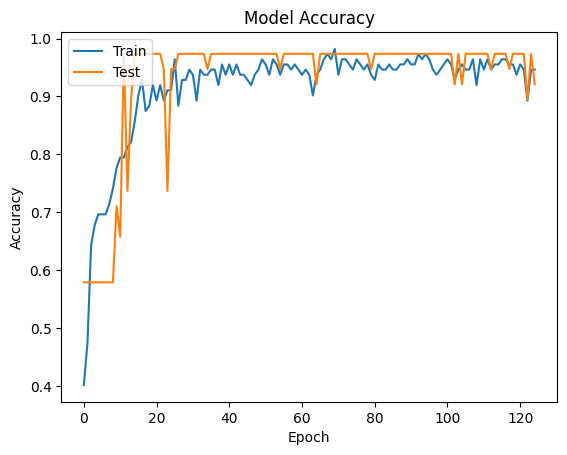

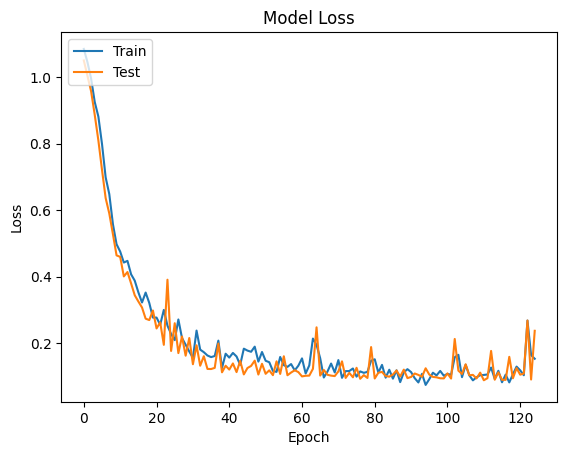

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf


# Load and preprocess the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df_norm = normalize(df)
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

# Create the neural network model
model = Sequential()
model.add(Dense(units=20, input_dim=4, activation='relu'))  # First hidden layer
model.add(Dense(units=100, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout after the second hidden layer
model.add(Dense(units=100, activation='relu'))  # Third hidden layer
model.add(Dense(units=3, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, batch_size=10, epochs=125,
                    verbose=1, validation_data=(x_test, y_test_cat))

# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Add L1 regularizer
You will need to add a kernel_regularizer parameter to the hidden layers of the neural network (https://keras.io/api/layers/regularizers/)

Epoch 1/125


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3779 - loss: 11.8650 - val_accuracy: 0.5789 - val_loss: 10.8307
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5353 - loss: 10.5040 - val_accuracy: 0.5789 - val_loss: 9.5619
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6890 - loss: 9.2421 - val_accuracy: 0.5789 - val_loss: 8.3795
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6630 - loss: 8.0906 - val_accuracy: 0.5789 - val_loss: 7.2888
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6366 - loss: 7.0290 - val_accuracy: 0.5789 - val_loss: 6.2898
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6091 - loss: 6.0578 - val_accuracy: 0.5789 - val_loss: 5.3904
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6116 - loss: 5.1818 - val_accuracy: 0.5789 - val_loss: 4.5898
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5961 - loss: 4.4051 - val_accuracy: 0.5789 - val_loss

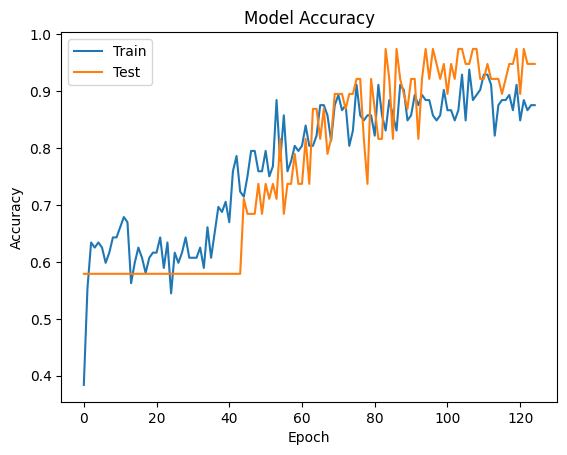

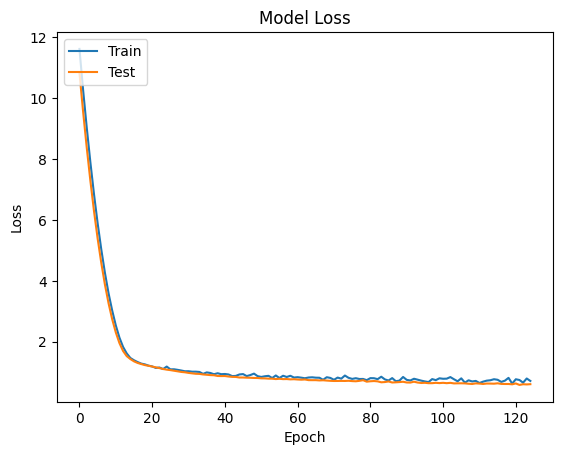

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df_norm = normalize(df)
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

# Create the neural network model with L1 regularization
model = Sequential()
model.add(Dense(units=20, input_dim=4, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l1(0.01)))  # L1 regularization in the first hidden layer
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l1(0.01)))  # L1 regularization in the second hidden layer
model.add(Dropout(0.5))  # Dropout after the second hidden layer
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l1(0.01)))  # L1 regularization in the third hidden layer
model.add(Dense(units=3, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, batch_size=10, epochs=125,
                    verbose=1, validation_data=(x_test, y_test_cat))

# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

* Imports: Imports all necessary libraries.
* Data Loading and Preprocessing: Loads the Iris dataset, normalizes features, splits data, and one-hot encodes targets.
* Model Creation with L1 Regularization: Creates the neural network model, adding L1 regularization to the kernel_regularizer parameter of each hidden layer using tf.keras.regularizers.l1(0.01).
* Compilation: Compiles the model with the specified loss function, optimizer, and metrics.
* Training: Trains the model using the training data and validates it using the validation data.
* Plotting: Plots the training and validation accuracy and loss curves to visualize the model's performance.

## Add L2 Regularizer

Epoch 1/125


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3015 - loss: 2.4225 - val_accuracy: 0.6316 - val_loss: 2.2335
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4605 - loss: 2.1839 - val_accuracy: 0.5789 - val_loss: 2.0343
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6106 - loss: 1.9814 - val_accuracy: 0.5789 - val_loss: 1.8597
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5232 - loss: 1.8112 - val_accuracy: 0.5263 - val_loss: 1.7095
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5733 - loss: 1.6755 - val_accuracy: 0.5789 - val_loss: 1.5696
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7159 - loss: 1.5321 - val_accuracy: 0.5789 - val_loss: 1.4437
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7063 - loss: 1.3927 - val_accuracy: 0.5789 - val_loss: 1.3165
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7141 - loss: 1.2530 - val_accuracy: 0.5789 - val_los

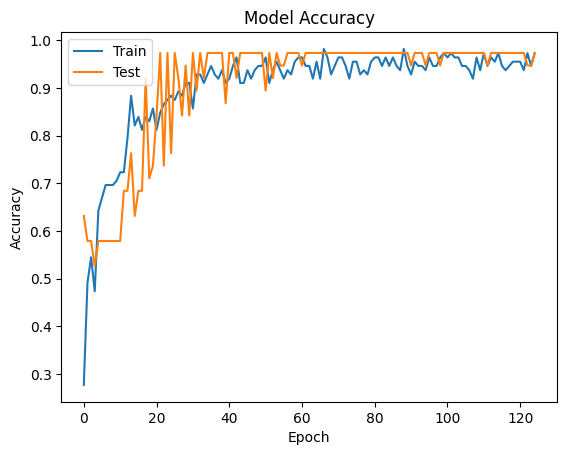

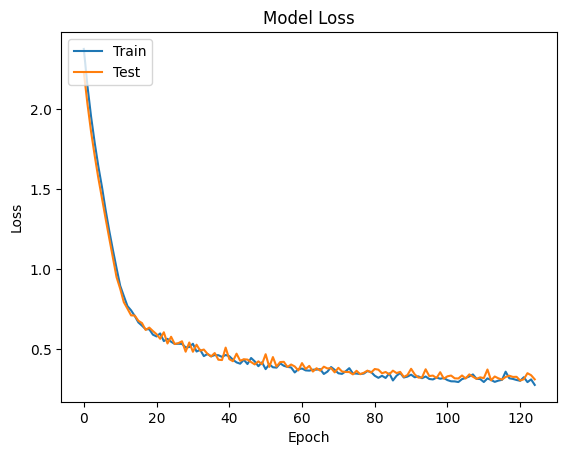

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df_norm = normalize(df)
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

# Create the neural network model with L2 regularization
model = Sequential()
model.add(Dense(units=20, input_dim=4, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # L2 regularization in the first hidden layer
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # L2 regularization in the second hidden layer
model.add(Dropout(0.5))  # Dropout after the second hidden layer
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # L2 regularization in the third hidden layer
model.add(Dense(units=3, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, batch_size=10, epochs=125,
                    verbose=1, validation_data=(x_test, y_test_cat))

# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Explanation of Changes:

* kernel_regularizer Parameter: The kernel_regularizer parameter is added to each Dense hidden layer.
* tf.keras.regularizers.l2(0.01): This specifies the use of L2 regularization with a regularization strength of 0.01. You can adjust this value to control the amount of regularization.

How L2 Regularization Works:

* L2 regularization adds a penalty to the loss function that is proportional to the square of the weights in the layer.
* This penalty encourages the model to learn smaller weights, making the model less sensitive to individual data points.
* By reducing the magnitude of the weights, L2 regularization helps to prevent overfitting.

Important Considerations:

* Regularization Strength: The 0.01 value (regularization strength) is a hyperparameter. Experiment with different values to find the best one for your model.
* Impact on Weights: L2 regularization tends to shrink the weights towards zero but does not typically make them exactly zero (like L1 regularization)

## Add L1 and L2 regularizers

Epoch 1/125


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2780 - loss: 13.3086 - val_accuracy: 0.4211 - val_loss: 12.0843
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4215 - loss: 11.7235 - val_accuracy: 0.5789 - val_loss: 10.6170
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4978 - loss: 10.2805 - val_accuracy: 0.2368 - val_loss: 9.2710
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4453 - loss: 8.9545 - val_accuracy: 0.3158 - val_loss: 8.0441
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5325 - loss: 7.7567 - val_accuracy: 0.5789 - val_loss: 6.9317
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5456 - loss: 6.6748 - val_accuracy: 0.5789 - val_loss: 5.9364
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5260 - loss: 5.6984 - val_accuracy: 0.2368 - val_loss: 5.0535
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4496 - loss: 4.8412 - val_accuracy: 0.5263 - val_

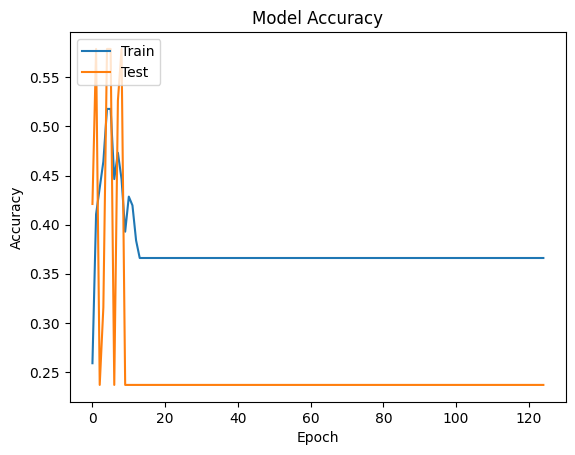

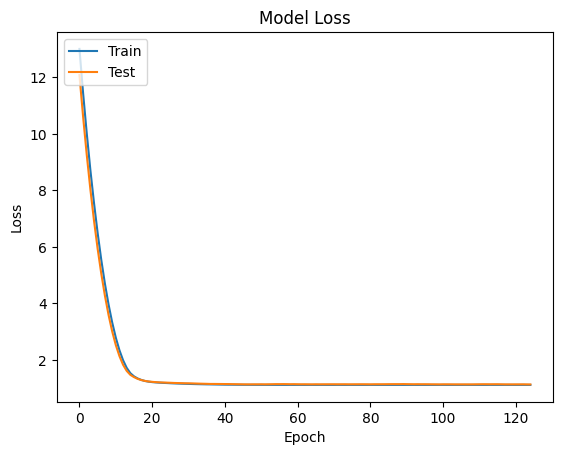

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df_norm = normalize(df)
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

# Create the neural network model with L1 and L2 regularization
model = Sequential()
model.add(Dense(units=20, input_dim=4, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))  # L1 and L2 in the first hidden layer
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))  # L1 and L2 in the second hidden layer
model.add(Dropout(0.5))  # Dropout after the second hidden layer
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))  # L1 and L2 in the third hidden layer
model.add(Dense(units=3, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, batch_size=10, epochs=125,
                    verbose=1, validation_data=(x_test, y_test_cat))

# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

* Explanation of Changes:

* kernel_regularizer Parameter: The kernel_regularizer parameter is added to each Dense hidden layer.
* tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01): This specifies the use of both

* L1 and L2 regularization.
* l1=0.01: Sets the L1 regularization strength.
l2=0.01: Sets the L2 regularization strength.

How L1 and L2 Regularization Work Together:

* L1 Regularization: Adds a penalty proportional to the absolute values of the weights, encouraging sparsity (some weights become zero).
* L2 Regularization: Adds a penalty proportional to the square of the weights, encouraging smaller weights overall.

By combining L1 and L2, you get a balance between feature selection (from L1) and weight shrinkage (from L2), which can be very effective in preventing overfitting.

Important Considerations:

* Regularization Strengths: The l1 and l2 values are hyperparameters. You can experiment with different values to find the best combination for your model.
* Elastic Net: This combination of L1 and L2 regularization is sometimes referred to as "Elastic Net regularization."